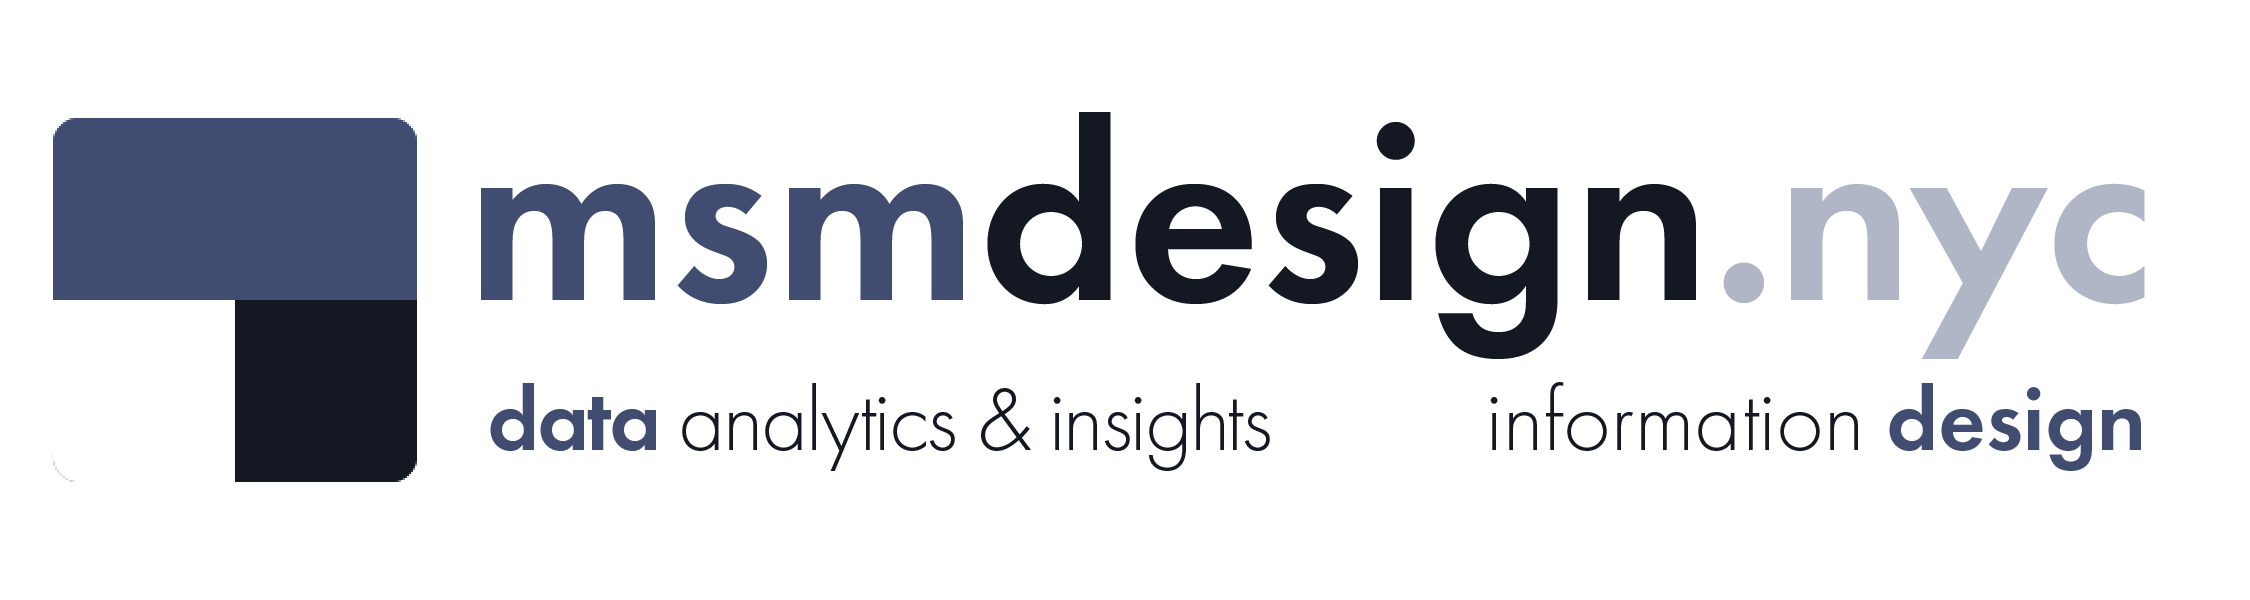

---
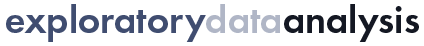

---

> ### What is Exploratory Data Analysis?
> **Exploratory data analysis (EDA)** is a technique used by data scientists to inspect, characterize and briefly summarize the contents of a dataset. EDA is often the first step when encountering a new or unfamiliar dataset. EDA helps the data scientist become acquainted with a dataset and test some basic assumptions about the data. By the end of the EDA process, some initial insights can be drawn from the dataset and a framework for further analysis or modeling is established.

---

# Civil Service List (Active)

**Dataset Analyzed:** *Civil Service List (Active)*

**About This Dataset:** A Civil Service List consists of all candidates who passed an exam, ranked in score order. An established list is considered active for no less than one year and no more than four years from the date of establishment. For more information visit DCAS’ “Work for the City” webpage at: https://www1.nyc.gov/site/dcas/employment/take-an-exam.page Data provided by the Department of Citywide Administrative Services (DCAS), the City of New York: https://data.cityofnewyork.us/City-Government/Civil-Service-List-Active-/vx8i-nprf



**Acknowledgements:** NYC Open Data https://opendata.cityofnewyork.us/


**EDA Catalogue Number:** INS-010


**EDA Publication Date:** Tuesday, January 10, 2023


**Language:** Python


**Libraries Used:** NumPy, pandas, matplotlib, seaborn


**EDA Author:** David White


**Contact:** david@msmdesign.nyc | [msmdesign.nyc](https://msmdesign.nyc/)

---

## **0. Prepare the workspace**

### 0.1 Import Python libraries, packages and functions

In [2]:
# import libraries for data wrangling, aggregate functions and basic descriptive statistics
import numpy as np
import pandas as pd

# import data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

### 0.2 Adjust display options to make plots easier to read and understand

In [4]:
# specify seaborn styling options
sns.set_theme(
    context='talk', 
    style='whitegrid', 
    palette='Accent',
    font='Courier New', 
    font_scale=1.15)    

# allow plots to display inline within the notebook
%matplotlib inline

### 0.3 Set Markdown tables to align-left within notebook cells

In [5]:
%%html
<style>
table {float:left}
</style>

### 0.4 Display all rows of output by default

In [6]:
pd.set_option('display.max_rows', None)

# to reset:
# pd.reset_option('display.max_rows')

### 0.5 Format large numbers and display floating point values to two decimal places

In [7]:
pd.set_option('display.float_format',  '{:,.2f}'.format)

# to reset:
# pd.reset_option('display.float_format')

### 0.6 Load the raw data file into the notebook and visually confirm that it has been read in as expected

In [15]:
# load the data from a csv file (stored locally) into a new DataFrame object

csv = r"F:\Creative Cloud Files\MSM Client 001 - Mister Shepherd Media LLC\MSM Design\github_msm_design\exploratory-data-analysis\insights-made-fresh-daily\nyc-open-data\ins-010\data\Civil_Service_List__Active_.csv"

candidates_temp = pd.read_csv(csv, encoding='utf-8', low_memory=False)

In [16]:
# glimpse the first three rows

candidates_temp.head(3)

,Exam No,List No,First Name,MI,Last Name,Adj. FA,List Title Code,List Title Desc,Group No,List Agency Code,List Agency Desc,List Div Code,Published Date,Established Date,Anniversary Date,Extension Date,Veteran Credit,Parent Lgy Credit,Sibling Lgy Credit,Residency Credit
0,162,877.00,YAHAIRA,NaN,ALMONTE,78.00,10001,ADMINISTRATIVE ACCOUNTANT,0,0,OPEN COMPETITIVE,NaN,05/26/2021,07/28/2021,07/28/2025,NaN,NaN,NaN,NaN,NaN
1,162,878.00,CHI SUN,NaN,CHOW,77.00,10001,ADMINISTRATIVE ACCOUNTANT,0,0,OPEN COMPETITIVE,NaN,05/26/2021,07/28/2021,07/28/2025,NaN,NaN,NaN,NaN,NaN
2,162,879.00,RACHEL,NaN,CANCEL,77.00,10001,ADMINISTRATIVE ACCOUNTANT,0,0,OPEN COMPETITIVE,NaN,05/26/2021,07/28/2021,07/28/2025,NaN,NaN,NaN,NaN,NaN


In [17]:
# glimpse the last three rows

candidates_temp.tail(3)

,Exam No,List No,First Name,MI,Last Name,Adj. FA,List Title Code,List Title Desc,Group No,List Agency Code,List Agency Desc,List Div Code,Published Date,Established Date,Anniversary Date,Extension Date,Veteran Credit,Parent Lgy Credit,Sibling Lgy Credit,Residency Credit
568423,504,1.00,ANAND,NaN,HEMLALL,84.06,92610,MACHINIST,0,40,DEPARTMENT OF EDUCATION,NaN,NaN,11/03/2021,11/03/2025,NaN,NaN,NaN,NaN,NaN
568424,504,1.00,MIHAIL,A,ZAINEA,78.19,92610,MACHINIST,0,826,DEPARTMENT OF ENVIRONMENTAL PROTECTION,NaN,NaN,11/03/2021,11/03/2025,NaN,NaN,NaN,NaN,NaN
568425,504,1.00,DIOGENES,A,MATA,73.10,92610,MACHINIST,0,841,DEPARTMENT OF TRANSPORTATION,NaN,NaN,11/03/2021,11/03/2025,NaN,NaN,NaN,NaN,NaN


In [18]:
# glimpse ten randomly selected rows

candidates_temp.sample(10, random_state=42)

,Exam No,List No,First Name,MI,Last Name,Adj. FA,List Title Code,List Title Desc,Group No,List Agency Code,List Agency Desc,List Div Code,Published Date,Established Date,Anniversary Date,Extension Date,Veteran Credit,Parent Lgy Credit,Sibling Lgy Credit,Residency Credit
386168,6325,853.00,SHAKEEM,NaN,DAWKINS,72.50,70410,CORRECTION OFFICER,0,0,OPEN COMPETITIVE,NaN,NaN,09/21/2016,09/21/2020,09/21/2023,NaN,NaN,NaN,NaN
339198,7001,731.00,JAMES,R,MCGEE,104.00,70310,FIREFIGHTER,0,0,OPEN COMPETITIVE,NaN,06/13/2018,02/27/2019,02/27/2023,NaN,NaN,NaN,NaN,Residency Credit
501893,9618,"2,017.00",EDWIN,NaN,PATINO,81.67,91203,BUS OPERATOR,0,0,OPEN COMPETITIVE,NaN,NaN,09/08/2021,09/08/2025,NaN,NaN,NaN,NaN,NaN
80082,9036,100.00,ISAAC,NaN,KHAN,75.00,20202,CIVIL ENGINEERING INTERN,0,0,OPEN COMPETITIVE,NaN,NaN,03/17/2021,03/17/2025,NaN,NaN,NaN,NaN,NaN
105489,1177,309.00,RALEIGH,NaN,FOWLER,70.00,51001,SPECIAL CONSULTANT (MENTAL HEALTH STANDARDS AN...,0,0,OPEN COMPETITIVE,NaN,07/28/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360019,7001,"10,593.00",JOSHUA,NaN,LORCY,97.00,70310,FIREFIGHTER,0,0,OPEN COMPETITIVE,NaN,06/13/2018,02/27/2019,02/27/2023,NaN,NaN,NaN,NaN,Residency Credit
16538,9011,132.00,RATNAGIRISH,NaN,NORI,100.00,10050,COMPUTER SYSTEMS MANAGER,0,0,OPEN COMPETITIVE,NaN,11/20/2019,10/21/2020,10/21/2024,NaN,NaN,NaN,NaN,NaN
171295,9326,259.00,TIYANNA,NaN,CAMERON,88.23,60817,SCHOOL SAFETY AGENT,0,0,OPEN COMPETITIVE,NaN,NaN,11/27/2019,11/27/2023,NaN,NaN,NaN,NaN,NaN
293817,5329,852.00,CEYHUN,NaN,DAGDEVIREN,84.71,70210,POLICE OFFICER,0,0,OPEN COMPETITIVE,NaN,06/01/2016,07/07/2017,07/07/2021,07/07/2023,NaN,NaN,NaN,NaN
431514,144,"2,242.00",INDIRA,A,SIMPSON,84.00,71012,POLICE COMMUNICATIONS TECHNICIAN,0,0,OPEN COMPETITIVE,NaN,NaN,02/23/2022,02/23/2026,NaN,NaN,NaN,NaN,NaN


**The data has been loaded and has been read in as expected.**

### 0.7. Check the data type of each column

In [24]:
# display the data type of each column

candidates_temp.dtypes

Exam No                 int64
List No               float64
First Name             object
MI                     object
Last Name              object
Adj. FA               float64
List Title Code         int64
List Title Desc        object
Group No                int64
List Agency Code        int64
List Agency Desc       object
List Div Code         float64
Published Date         object
Established Date       object
Anniversary Date       object
Extension Date         object
Veteran Credit         object
Parent Lgy Credit      object
Sibling Lgy Credit     object
Residency Credit       object
dtype: object

**Most of the columns have been read in as *object* data type. We'll need to change the data type of some columns to a something more appropriate.**

### 0.8 Refer to the [data dictionary](https://data.cityofnewyork.us/api/views/vx8i-nprf/files/0bbc24ad-b380-4552-b678-87bb4944180d?download=true&filename=Civil%20Service%20List_Active_Definitions.xlsx) and make sure that our DataFrame's data types match the source data. Reassign data types where needed.

In [25]:
# cast column(s) containing dates to datetime data type

candidates_temp['Published Date']   = pd.to_datetime(candidates_temp['Published Date'], errors='coerce')
candidates_temp['Established Date'] = pd.to_datetime(candidates_temp['Established Date'], errors='coerce')
candidates_temp['Anniversary Date'] = pd.to_datetime(candidates_temp['Anniversary Date'], errors='coerce')
candidates_temp['Extension Date']   = pd.to_datetime(candidates_temp['Extension Date'], errors='coerce')

In [37]:
# cast column(s) containing categorical varibles to categorical data type

candidates_temp['Exam No']            = candidates_temp['Exam No'].astype('category')
candidates_temp['List Title Desc']    = candidates_temp['List Title Desc'].astype('category')
candidates_temp['List Agency Desc']   = candidates_temp['List Agency Desc'].astype('category')
candidates_temp['Veteran Credit']     = candidates_temp['Veteran Credit'].astype('category')
candidates_temp['Parent Lgy Credit']  = candidates_temp['Parent Lgy Credit'].astype('category')
candidates_temp['Sibling Lgy Credit'] = candidates_temp['Sibling Lgy Credit'].astype('category')
candidates_temp['Residency Credit']   = candidates_temp['Residency Credit'].astype('category')

In [38]:
# display the DataFrame info once again to confirm that the data type changes have been made

candidates_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568426 entries, 0 to 568425
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Exam No             568426 non-null  category      
 1   List No             568426 non-null  float64       
 2   First Name          568416 non-null  object        
 3   MI                  322663 non-null  object        
 4   Last Name           568418 non-null  object        
 5   Adj. FA             568426 non-null  float64       
 6   List Title Code     568426 non-null  int64         
 7   List Title Desc     568426 non-null  category      
 8   Group No            568426 non-null  int64         
 9   List Agency Code    568426 non-null  int64         
 10  List Agency Desc    568426 non-null  category      
 11  List Div Code       0 non-null       float64       
 12  Published Date      274960 non-null  datetime64[ns]
 13  Established Date    557530 no

---

## **1. Describe the characteristics of the dataset**

### 1.1 How many rows and how many columns are in our dataset?

In [28]:
# display the number of rows and columns in the DataFrame

rows = candidates_temp.shape[0]
columns = candidates_temp.shape[1]

print(f'There are {rows} rows and {columns} columns in the dataset.')

There are 568426 rows and 20 columns in the dataset.


### 1.2 Identify the index of our DataFrame

In [29]:
# display the index of the DataFrame

candidates_temp.index

RangeIndex(start=0, stop=568426, step=1)

Our DataFrame has an interger index. We know from the data dictionary that each row is an individual job candidate.

### 1.3 What are the column headings in our dataset?

In [30]:
# display a list of the DataFrame's columns

list(candidates_temp.columns)

['Exam No',
 'List No',
 'First Name',
 'MI',
 'Last Name',
 'Adj. FA',
 'List Title Code',
 'List Title Desc',
 'Group No',
 'List Agency Code',
 'List Agency Desc',
 'List Div Code',
 'Published Date',
 'Established Date',
 'Anniversary Date',
 'Extension Date',
 'Veteran Credit',
 'Parent Lgy Credit',
 'Sibling Lgy Credit',
 'Residency Credit']

### 1.4 What are the data types of each column?

In [31]:
# display the data type of each column in the DataFrame

candidates_temp.dtypes

Exam No                        int64
List No                      float64
First Name                    object
MI                            object
Last Name                     object
Adj. FA                      float64
List Title Code                int64
List Title Desc             category
Group No                       int64
List Agency Code               int64
List Agency Desc            category
List Div Code                float64
Published Date        datetime64[ns]
Established Date      datetime64[ns]
Anniversary Date      datetime64[ns]
Extension Date        datetime64[ns]
Veteran Credit              category
Parent Lgy Credit           category
Sibling Lgy Credit          category
Residency Credit            category
dtype: object

### 1.5 How many null values are in each column?

In [32]:
# display the number of missing values in each column of the DataFrame

candidates_temp.isna().sum()

Exam No                    0
List No                    0
First Name                10
MI                    245763
Last Name                  8
Adj. FA                    0
List Title Code            0
List Title Desc            0
Group No                   0
List Agency Code           0
List Agency Desc           0
List Div Code         568426
Published Date        293466
Established Date       10896
Anniversary Date       10896
Extension Date        309858
Veteran Credit        555349
Parent Lgy Credit     567319
Sibling Lgy Credit    567990
Residency Credit      448636
dtype: int64

### 1.6 How many unique values are there in each column?

In [33]:
# display the count of unique elements in each column

candidates_temp.nunique(axis=0, dropna=True)

Exam No                 861
List No               75403
First Name            58600
MI                       37
Last Name             83436
Adj. FA                2869
List Title Code         490
List Title Desc         490
Group No                  3
List Agency Code         62
List Agency Desc         63
List Div Code             0
Published Date          165
Established Date        311
Anniversary Date        315
Extension Date          116
Veteran Credit            2
Parent Lgy Credit         1
Sibling Lgy Credit        1
Residency Credit          1
dtype: int64

---

## **2. Briefly summarize the contents of the dataset**

### 2.1 Summarize the columns containing numerical variables

In [34]:
# describe numeric columns only

num_cols = ['Adj. FA']

candidates_temp[num_cols].describe(include=[np.number])

,Adj. FA
count,"568,426.00"
mean,87.52
std,8.91
min,65.00
25%,80.75
50%,88.23
75%,94.75
max,127.24


### 2.2 Summarize the columns containing datetime variables

In [35]:
# summarize the data contained in columns with the 'datetime' data type only

date_cols = ['Published Date',
             'Established Date',
             'Anniversary Date',
             'Extension Date']

candidates_temp[date_cols].describe(datetime_is_numeric=True) 

,Published Date,Established Date,Anniversary Date,Extension Date
count,274960,557530,557530,258568
mean,2017-11-26 11:34:59.563573248,2019-02-07 12:36:10.344197120,2023-02-07 12:55:35.712876800,2023-06-19 07:19:32.636985600
min,2010-07-28 00:00:00,2013-10-30 00:00:00,2017-10-30 00:00:00,2023-01-11 00:00:00
25%,2015-09-23 00:00:00,2017-04-05 00:00:00,2021-04-05 00:00:00,2023-03-16 00:00:00
50%,2018-04-11 00:00:00,2019-02-27 00:00:00,2023-02-27 00:00:00,2023-04-25 00:00:00
75%,2019-02-27 00:00:00,2021-01-13 00:00:00,2025-01-13 00:00:00,2023-09-22 00:00:00
max,2022-11-23 00:00:00,2023-01-11 00:00:00,2027-01-11 00:00:00,2024-01-31 00:00:00


### 2.3 Summarize the columns containing categorical variables

In [39]:
# summarize the data contained in columns with the 'category' data type only

candidates_temp.describe(include=['category'])

,Exam No,List Title Desc,List Agency Desc,Veteran Credit,Parent Lgy Credit,Sibling Lgy Credit,Residency Credit
count,568426,568426,568426,13077,1107,436,119790
unique,861,490,63,2,1,1,1
top,5001,POLICE OFFICER,OPEN COMPETITIVE,Veteran's Credit,Parent Legacy Credit,Sibling Legacy Credit,Residency Credit
freq,68859,80635,525625,11370,1107,436,119790


---

## **3. Select a subset of data for closer examination**

### 3.1 Select a subset of columns

In [ ]:
# display all columns

list(df.columns)

In [84]:
# select a subset of columns to examine
selected_cols = ['Exam No',
                 'List Title Desc',
                 'List Agency Desc',
                 'Published Date',
                 'Established Date',
                 'Anniversary Date',
                 'Extension Date',
                 'Veteran Credit',
                 'Parent Lgy Credit',
                 'Sibling Lgy Credit',
                 'Residency Credit',
                 'Adj. FA']

candidates = candidates_temp[selected_cols]

### 3.2 Select a subset of rows

In [85]:
# subset only exams results published in the 2022 calendar year

candidates2022 = candidates.loc[candidates['Published Date'] >= '2022-01-01 00:00:00']

In [86]:
# confirm that the date range has been subset as expected

candidates2022['Published Date'].min()

Timestamp('2022-02-02 00:00:00')

In [87]:
candidates2022['Published Date'].max()

Timestamp('2022-11-23 00:00:00')

### 3.3 Display the shape of the data subset

In [89]:
rows = candidates2022.shape[0]
columns = candidates2022.shape[1]

print(f'There are {rows} rows and {columns} columns in the subset.')

There are 24972 rows and 12 columns in the subset.


---

## 4. **Examine the individual variables in the dataset**

### 4.1 What is the distribution of job titles represented in the dataset?

In [68]:
candidates2022['List Title Desc'].value_counts().nlargest(40)

ADMINISTRATIVE MANAGER                             6349
PRINCIPAL ADMINISTRATIVE ASSOCIATE                 4353
ADMINISTRATIVE STAFF ANALYST                       2455
SCHOOL SAFETY AGENT                                1445
COMPUTER ASSOCIATE (SOFTWARE)                       759
FRAUD INVESTIGATOR                                  640
CERTIFIED IT ADMINISTRATOR (LAN/WAN)                640
COMPUTER ASSOCIATE (TECHNICAL SUPPORT)              624
YOUTH DEVELOPMENT SPECIALIST                        594
CALL CENTER REPRESENTATIVE                          594
CONSTRUCTION PROJECT MANAGER                        587
EMERGENCY MEDICAL SPECIALIST-PARAMEDIC              568
QUALITY ASSURANCE SPECIALIST TRAINEE                461
ASSOCIATE RETIREMENT BENEFITS EXAMINER              458
COMPUTER PROGRAMMER ANALYST                         419
CONTRACT SPECIALIST                                 356
ADMINISTRATIVE QUALITY ASSURANCE SPECIALIST         326
PUBLIC HEALTH SANITARIAN                        

In [69]:
candidates2022['List Title Desc'].value_counts(normalize=True).nlargest(40)

ADMINISTRATIVE MANAGER                            0.25
PRINCIPAL ADMINISTRATIVE ASSOCIATE                0.17
ADMINISTRATIVE STAFF ANALYST                      0.10
SCHOOL SAFETY AGENT                               0.06
COMPUTER ASSOCIATE (SOFTWARE)                     0.03
FRAUD INVESTIGATOR                                0.03
CERTIFIED IT ADMINISTRATOR (LAN/WAN)              0.03
COMPUTER ASSOCIATE (TECHNICAL SUPPORT)            0.02
YOUTH DEVELOPMENT SPECIALIST                      0.02
CALL CENTER REPRESENTATIVE                        0.02
CONSTRUCTION PROJECT MANAGER                      0.02
EMERGENCY MEDICAL SPECIALIST-PARAMEDIC            0.02
QUALITY ASSURANCE SPECIALIST TRAINEE              0.02
ASSOCIATE RETIREMENT BENEFITS EXAMINER            0.02
COMPUTER PROGRAMMER ANALYST                       0.02
CONTRACT SPECIALIST                               0.01
ADMINISTRATIVE QUALITY ASSURANCE SPECIALIST       0.01
PUBLIC HEALTH SANITARIAN                          0.01
INSPECTOR 

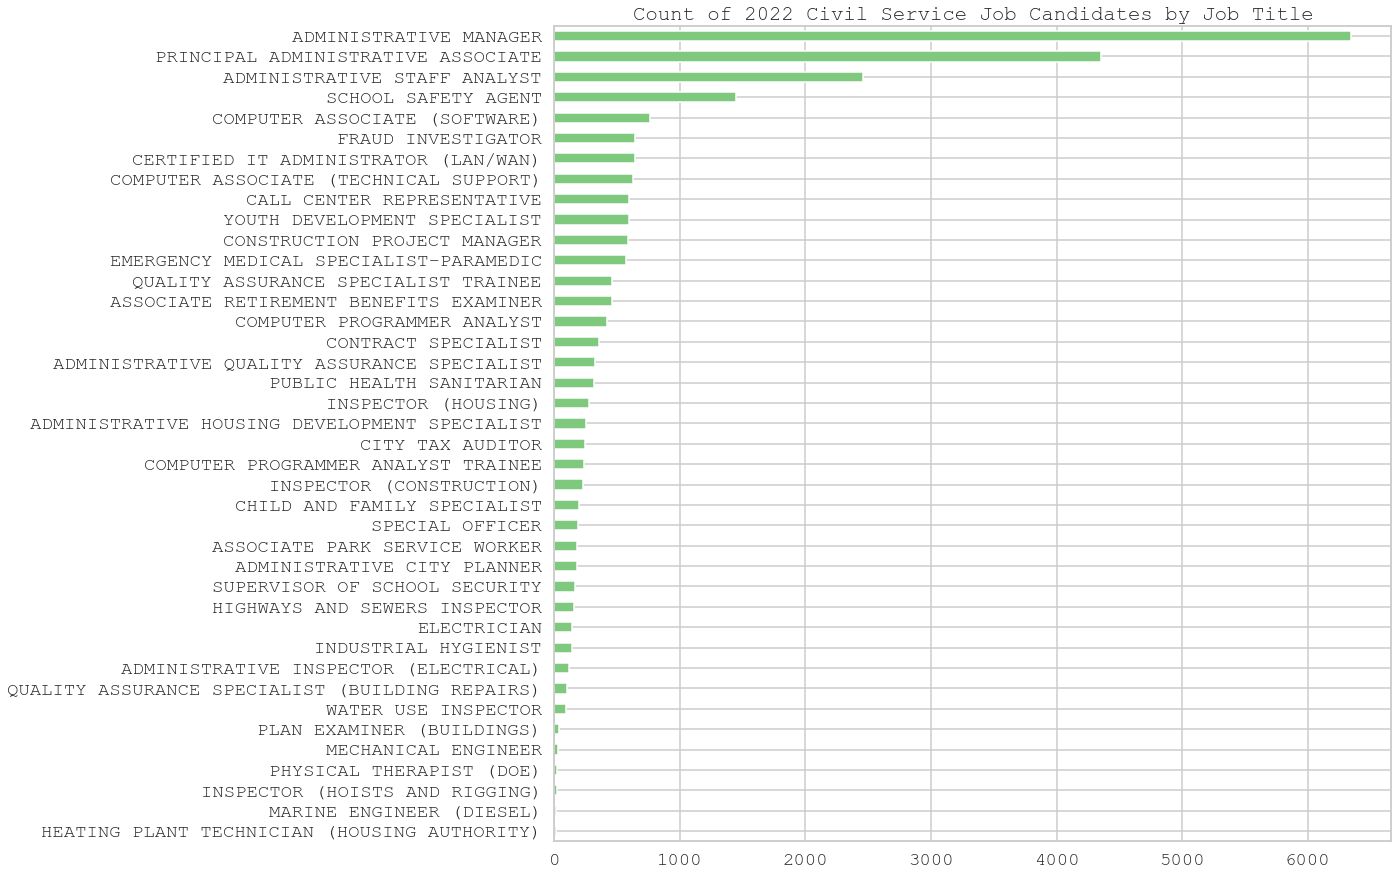

In [76]:
candidates2022['List Title Desc'].value_counts().nlargest(40).sort_values().plot(kind='barh',
                                                                                 figsize=(15,15),
                                                                                 title="Count of 2022 Civil Service Job Candidates by Job Title");

### 4.2 What is the distribution of hiring agencies represented in the dataset?

In [99]:
candidates2022['List Agency Desc'].value_counts().dropna()

OPEN COMPETITIVE                                               22236
FIRE DEPARTMENT                                                  641
HRA/DEPARTMENT OF SOCIAL SERVICES                                343
POLICE DEPARTMENT                                                282
DEPARTMENT OF PARKS & RECREATION                                 261
DEPARTMENT OF ENVIRONMENTAL PROTECTION                           158
ADMINISTRATION FOR CHILDREN'S SERVICES                           124
DEPARTMENT OF HEALTH AND MENTAL HYGIENE                          115
DEPARTMENT OF FINANCE                                            114
DEPARTMENT OF TRANSPORTATION                                     105
DEPARTMENT OF EDUCATION                                           61
DEPARTMENT OF INFORMATION TECHNOLOGY AND TELECOMMUNICATIONS       60
DEPARTMENT OF CITYWIDE ADMINISTRATIVE SERVICES                    57
HOUSING PRESERVATION & DEVELOPMENT                                49
DEPARTMENT OF CORRECTION          

In [98]:
candidates2022['List Agency Desc'].value_counts(normalize=True).dropna()

OPEN COMPETITIVE                                              0.89
FIRE DEPARTMENT                                               0.03
HRA/DEPARTMENT OF SOCIAL SERVICES                             0.01
POLICE DEPARTMENT                                             0.01
DEPARTMENT OF PARKS & RECREATION                              0.01
DEPARTMENT OF ENVIRONMENTAL PROTECTION                        0.01
ADMINISTRATION FOR CHILDREN'S SERVICES                        0.00
DEPARTMENT OF HEALTH AND MENTAL HYGIENE                       0.00
DEPARTMENT OF FINANCE                                         0.00
DEPARTMENT OF TRANSPORTATION                                  0.00
DEPARTMENT OF EDUCATION                                       0.00
DEPARTMENT OF INFORMATION TECHNOLOGY AND TELECOMMUNICATIONS   0.00
DEPARTMENT OF CITYWIDE ADMINISTRATIVE SERVICES                0.00
HOUSING PRESERVATION & DEVELOPMENT                            0.00
DEPARTMENT OF CORRECTION                                      

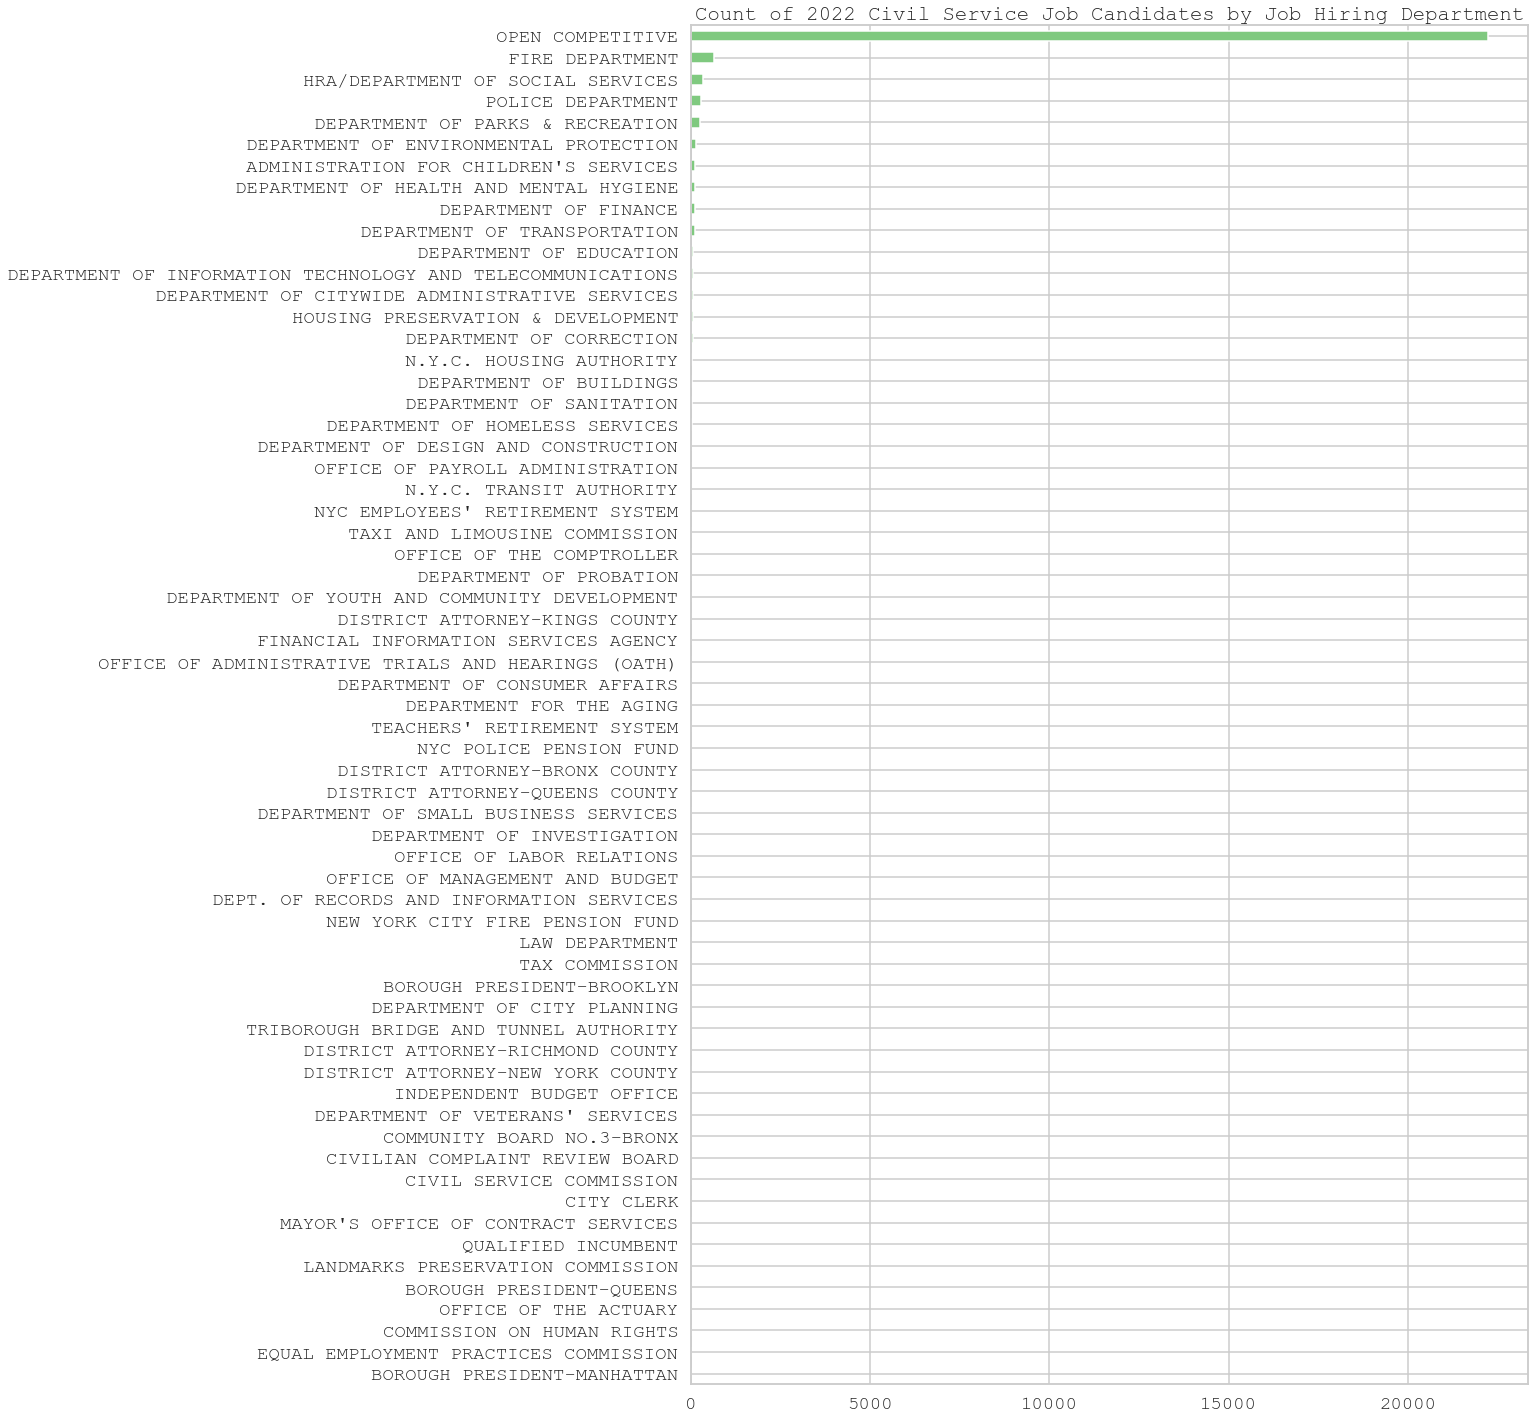

In [102]:
candidates2022['List Agency Desc'].value_counts().dropna().sort_values().plot(kind='barh',
                                                                                 figsize=(15,25),
                                                                                 title="Count of 2022 Civil Service Job Candidates by Job Hiring Department");

### 4.3 What is the distribution of exam scores represented in the dataset?

In [91]:
# display summary statistics for exam scores (overall)

candidates2022['Adj. FA'].describe()

count   24,972.00
mean        91.20
std         10.84
min         70.00
25%         81.82
50%        100.00
75%        100.00
max        120.00
Name: Adj. FA, dtype: float64

In [97]:
# display summary statistics for exam scores by job title

candidates2022.groupby('List Title Desc').describe().dropna()

Adj. FA                    \
                                                   count  mean   std   min   
List Title Desc                                                              
ADMINISTRATIVE CITY PLANNER                       177.00 99.05  3.79 70.00   
ADMINISTRATIVE HOUSING DEVELOPMENT SPECIALIST     256.00 93.75 10.32 70.00   
ADMINISTRATIVE INSPECTOR (ELECTRICAL)             117.00 96.91  6.63 70.00   
ADMINISTRATIVE MANAGER                          6,349.00 97.95  5.62 70.00   
ADMINISTRATIVE QUALITY ASSURANCE SPECIALIST       326.00 97.56  6.94 70.00   
ADMINISTRATIVE STAFF ANALYST                    2,455.00 78.96  5.49 70.00   
ASSOCIATE PARK SERVICE WORKER                     178.00 97.71  4.90 77.50   
ASSOCIATE RETIREMENT BENEFITS EXAMINER            458.00 87.97 10.29 70.00   
CALL CENTER REPRESENTATIVE                        594.00 91.12 10.82 70.00   
CERTIFIED IT ADMINISTRATOR (LAN/WAN)              640.00 94.68  9.49 70.00   
CHILD AND FAMILY SPECIALIST                       200.00 86.19  9.93 70.00   
CITY TAX AUDITOR                                  243.00 76.52 10.02 70.00   
COMPUTER ASSOCIATE (SOFTWARE)                     759.00 93.46  9.03 70.00   
COMPUTER ASSOCIATE (TECHNICAL SUPPORT)            624.00 94.77  8.09 70.00   
COMPUTER PROGRAMMER ANALYST                       419.00 89.70 11.23 70.00   
COMPUTER PROGRAMMER ANALYST TRAINEE               237.00 83.95  6.63 70.01   
CONSTRUCTION PROJECT MANAGER                      587.00 78.36  5.88 70.00   
CONTRACT SPECIALIST                               356.00 93.28  9.25 72.50   
ELECTRICIAN                                       141.00 80.50  6.98 70.00   
EMERGENCY MEDICAL SPECIALIST-PARAMEDIC            568.00 85.91  9.87 70.00   
FRAUD INVESTIGATOR                                640.00 81.16 12.61 70.00   
HEATING PLANT TECHNICIAN (HOUSING AUTHORITY)       11.00 79.45  6.76 70.00   
HIGHWAYS AND SEWERS INSPECTOR                     154.00 95.83  9.29 70.00   
INDUSTRIAL HYGIENIST                              137.00 87.31 11.50 70.00   
INSPECTOR (CONSTRUCTION)                          229.00 95.88  8.47 70.00   
INSPECTOR (HOISTS AND RIGGING)                     19.00 83.34  9.29 71.00   
INSPECTOR (HOUSING)                               276.00 92.68 11.38 70.00   
MARINE ENGINEER (DIESEL)                           17.00 84.38 14.39 70.00   
MECHANICAL ENGINEER                                31.00 87.90 11.51 70.00   
PHYSICAL THERAPIST (DOE)                           22.00 89.36  7.85 73.50   
PLAN EXAMINER (BUILDINGS)                          39.00 86.87 13.12 70.00   
PRINCIPAL ADMINISTRATIVE ASSOCIATE              4,353.00 97.23  7.07 70.00   
PUBLIC HEALTH SANITARIAN                          317.00 78.61 10.58 70.00   
QUALITY ASSURANCE SPECIALIST (BUILDING REPAIRS)   100.00 94.85  9.71 70.00   
QUALITY ASSURANCE SPECIALIST TRAINEE              461.00 86.41 11.24 70.00   
SCHOOL SAFETY AGENT                             1,445.00 82.16  7.00 70.91   
SPECIAL OFFICER                                   187.00 82.98  6.77 70.00   
SUPERVISOR OF SCHOOL SECURITY                     166.00 78.56  3.76 71.80   
WATER USE INSPECTOR                                90.00 86.08 11.99 70.00   
YOUTH DEVELOPMENT SPECIALIST                      594.00 86.36 12.91 70.00   

                                                                             
                                                   25%    50%    75%    max  
List Title Desc                                                              
ADMINISTRATIVE CITY PLANNER                     100.00 100.00 100.00 100.00  
ADMINISTRATIVE HOUSING DEVELOPMENT SPECIALIST    90.00 100.00 100.00 100.00  
ADMINISTRATIVE INSPECTOR (ELECTRICAL)           100.00 100.00 100.00 105.00  
ADMINISTRATIVE MANAGER                          100.00 100.00 100.00 120.00  
ADMINISTRATIVE QUALITY ASSURANCE SPECIALIST     100.00 100.00 100.00 110.00  
ADMINISTRATIVE STAFF ANALYST                     74.38  78.12  83.12  

In [105]:
# display summary statistics for exam scores by hiring department

candidates2022.groupby('List Agency Desc').describe().dropna()

Adj. FA               \
                                                       count   mean   std   
List Agency Desc                                                            
ADMINISTRATION FOR CHILDREN'S SERVICES                124.00  98.61  4.18   
BOROUGH PRESIDENT-BROOKLYN                              2.00  96.25  5.30   
DEPARTMENT FOR THE AGING                                6.00  99.25  1.84   
DEPARTMENT OF BUILDINGS                                36.00  99.38  2.75   
DEPARTMENT OF CITY PLANNING                             2.00 100.00  0.00   
DEPARTMENT OF CITYWIDE ADMINISTRATIVE SERVICES         57.00  98.14  5.09   
DEPARTMENT OF CONSUMER AFFAIRS                          6.00  97.00  7.35   
DEPARTMENT OF CORRECTION                               48.00  97.61  6.32   
DEPARTMENT OF DESIGN AND CONSTRUCTION                  17.00  99.43  2.36   
DEPARTMENT OF EDUCATION                                61.00  97.91  6.26   
DEPARTMENT OF ENVIRONMENTAL PROTECTION                158.00  99.28  3.22   
DEPARTMENT OF FINANCE                                 114.00  98.68  4.10   
DEPARTMENT OF HEALTH AND MENTAL HYGIENE               115.00  98.40  4.69   
DEPARTMENT OF HOMELESS SERVICES                        19.00 100.00  0.00   
DEPARTMENT OF INFORMATION TECHNOLOGY AND TELECO...     60.00  98.65  4.87   
DEPARTMENT OF INVESTIGATION                             3.00 100.00  0.00   
DEPARTMENT OF PARKS & RECREATION                      261.00  97.86  5.25   
DEPARTMENT OF PROBATION                                10.00 100.00  0.00   
DEPARTMENT OF SANITATION                               32.00  96.16  8.70   
DEPARTMENT OF SMALL BUSINESS SERVICES                   4.00  98.75  2.50   
DEPARTMENT OF TRANSPORTATION                          105.00  98.59  4.08   
DEPARTMENT OF YOUTH AND COMMUNITY DEVELOPMENT          10.00  99.70  0.95   
DEPT. OF RECORDS AND INFORMATION SERVICES               2.00  94.50  7.78   
DISTRICT ATTORNEY-BRONX COUNTY                          5.00  99.60  0.89   
DISTRICT ATTORNEY-KINGS COUNTY                          9.00  98.00  6.00   
DISTRICT ATTORNEY-QUEENS COUNTY                         5.00  97.60  5.37   
FINANCIAL INFORMATION SERVICES AGENCY                   8.00  98.38  4.60   
FIRE DEPARTMENT                                       641.00  87.50 10.29   
HOUSING PRESERVATION & DEVELOPMENT                     49.00  97.38  7.18   
HRA/DEPARTMENT OF SOCIAL SERVICES                     343.00  97.53  6.23   
LAW DEPARTMENT                                          2.00 100.00  0.00   
N.Y.C. HOUSING AUTHORITY                               40.00  97.53  4.93   
N.Y.C. TRANSIT AUTHORITY                               13.00  99.65  0.90   
NEW YORK CITY FIRE PENSION FUND                         2.00 100.00  0.00   
NYC EMPLOYEES' RETIREMENT SYSTEM                       12.00 100.00  0.00   
NYC POLICE PENSION FUND                                 5.00 100.00  0.00   
OFFICE OF ADMINISTRATIVE TRIALS AND HEARINGS (O...      7.00 100.00  0.00   
OFFICE OF LABOR RELATIONS                               3.00  90.00 17.32   
OFFICE OF MANAGEMENT AND BUDGET                         2.00 100.00  0.00   
OFFICE OF PAYROLL ADMINISTRATION                       15.00  96.58  7.08   
OFFICE OF THE COMPTROLLER                              12.00  98.79  4.19   
OPEN COMPETITIVE                                   22,236.00  90.79 10.98   
POLICE DEPARTMENT                                     282.00  87.07 10.78   
TAX COMMISSION                                          2.00 100.00  0.00   
TAXI AND LIMOUSINE COMMISSION                          12.00 100.00  0.00   
TEACHERS' RETIREMENT SYSTEM                             6.00  96.00  7.27   

                                                                         \
                                                      min    25%    50%   
List Agency Desc                                                          
ADMINISTRATION FOR CHILDREN'S SERVICES              76

In [133]:
# find the job titles with the top mean scores

candidates2022.groupby('List Title Desc')['Adj. FA'].mean().dropna().sort_values(ascending=False)

List Title Desc
ADMINISTRATIVE CITY PLANNER                       99.05
ADMINISTRATIVE MANAGER                            97.95
ASSOCIATE PARK SERVICE WORKER                     97.71
ADMINISTRATIVE QUALITY ASSURANCE SPECIALIST       97.56
PRINCIPAL ADMINISTRATIVE ASSOCIATE                97.23
ADMINISTRATIVE INSPECTOR (ELECTRICAL)             96.91
INSPECTOR (CONSTRUCTION)                          95.88
HIGHWAYS AND SEWERS INSPECTOR                     95.83
QUALITY ASSURANCE SPECIALIST (BUILDING REPAIRS)   94.85
COMPUTER ASSOCIATE (TECHNICAL SUPPORT)            94.77
CERTIFIED IT ADMINISTRATOR (LAN/WAN)              94.68
ADMINISTRATIVE HOUSING DEVELOPMENT SPECIALIST     93.75
COMPUTER ASSOCIATE (SOFTWARE)                     93.46
CONTRACT SPECIALIST                               93.28
INSPECTOR (HOUSING)                               92.68
CALL CENTER REPRESENTATIVE                        91.12
COMPUTER PROGRAMMER ANALYST                       89.70
PHYSICAL THERAPIST (DOE)        

In [130]:
# find the job titles with the top median scores

candidates2022.groupby('List Title Desc')['Adj. FA'].median().dropna().sort_values(ascending=False)

List Title Desc
ADMINISTRATIVE CITY PLANNER                       100.00
ADMINISTRATIVE HOUSING DEVELOPMENT SPECIALIST     100.00
CONTRACT SPECIALIST                               100.00
INSPECTOR (CONSTRUCTION)                          100.00
INSPECTOR (HOUSING)                               100.00
COMPUTER ASSOCIATE (TECHNICAL SUPPORT)            100.00
COMPUTER ASSOCIATE (SOFTWARE)                     100.00
CERTIFIED IT ADMINISTRATOR (LAN/WAN)              100.00
PRINCIPAL ADMINISTRATIVE ASSOCIATE                100.00
ASSOCIATE PARK SERVICE WORKER                     100.00
QUALITY ASSURANCE SPECIALIST (BUILDING REPAIRS)   100.00
ADMINISTRATIVE QUALITY ASSURANCE SPECIALIST       100.00
ADMINISTRATIVE MANAGER                            100.00
ADMINISTRATIVE INSPECTOR (ELECTRICAL)             100.00
HIGHWAYS AND SEWERS INSPECTOR                     100.00
CALL CENTER REPRESENTATIVE                         97.00
COMPUTER PROGRAMMER ANALYST                        94.25
MECHANICAL ENGI

In [131]:
# find the agencies with the top mean scores

candidates2022.groupby('List Agency Desc')['Adj. FA'].mean().dropna().sort_values(ascending=False)

List Agency Desc
TRIBOROUGH BRIDGE AND TUNNEL AUTHORITY                        100.00
OFFICE OF ADMINISTRATIVE TRIALS AND HEARINGS (OATH)           100.00
LAW DEPARTMENT                                                100.00
DEPARTMENT OF VETERANS' SERVICES                              100.00
NEW YORK CITY FIRE PENSION FUND                               100.00
DEPARTMENT OF PROBATION                                       100.00
NYC EMPLOYEES' RETIREMENT SYSTEM                              100.00
DEPARTMENT OF INVESTIGATION                                   100.00
DEPARTMENT OF HOMELESS SERVICES                               100.00
NYC POLICE PENSION FUND                                       100.00
DISTRICT ATTORNEY-NEW YORK COUNTY                             100.00
DISTRICT ATTORNEY-RICHMOND COUNTY                             100.00
COMMUNITY BOARD NO.3-BRONX                                    100.00
TAXI AND LIMOUSINE COMMISSION                                 100.00
CITY CLERK       

In [132]:
# find the agencies with the top median scores

candidates2022.groupby('List Agency Desc')['Adj. FA'].median().dropna().sort_values(ascending=False)

List Agency Desc
ADMINISTRATION FOR CHILDREN'S SERVICES                        100.00
N.Y.C. TRANSIT AUTHORITY                                      100.00
DISTRICT ATTORNEY-BRONX COUNTY                                100.00
DISTRICT ATTORNEY-KINGS COUNTY                                100.00
DISTRICT ATTORNEY-NEW YORK COUNTY                             100.00
DISTRICT ATTORNEY-QUEENS COUNTY                               100.00
DISTRICT ATTORNEY-RICHMOND COUNTY                             100.00
FINANCIAL INFORMATION SERVICES AGENCY                         100.00
HOUSING PRESERVATION & DEVELOPMENT                            100.00
HRA/DEPARTMENT OF SOCIAL SERVICES                             100.00
LAW DEPARTMENT                                                100.00
N.Y.C. HOUSING AUTHORITY                                      100.00
NEW YORK CITY FIRE PENSION FUND                               100.00
DEPARTMENT OF VETERANS' SERVICES                              100.00
NYC EMPLOYEES' RE

---

## 5. Examine combinations of variables in the dataset

### 5.1 Analysis of scores for the Fire Department only

In [152]:
candidates2022['Adj. FA'].loc[candidates2022['List Agency Desc'] == 'FIRE DEPARTMENT'].value_counts(bins=5)

(94.0, 100.0]     222
(69.969, 76.0]    128
(76.0, 82.0]      102
(82.0, 88.0]      102
(88.0, 94.0]       87
Name: Adj. FA, dtype: int64

In [160]:
candidates2022['Adj. FA'].loc[candidates2022['List Agency Desc'] == 'FIRE DEPARTMENT'].value_counts(bins=5, normalize=True)

(94.0, 100.0]    0.35
(69.969, 76.0]   0.20
(76.0, 82.0]     0.16
(82.0, 88.0]     0.16
(88.0, 94.0]     0.14
Name: Adj. FA, dtype: float64

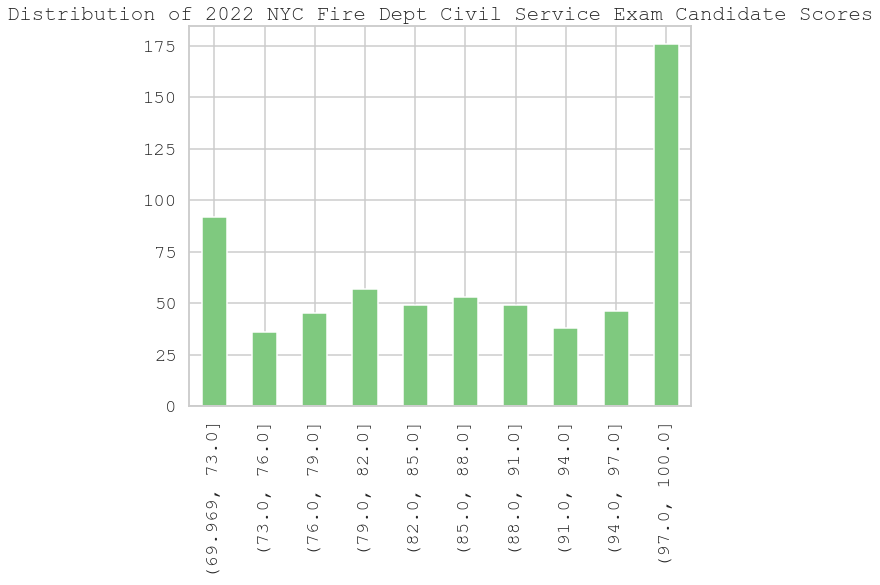

In [151]:
candidates2022['Adj. FA'].loc[candidates2022['List Agency Desc'] == 'FIRE DEPARTMENT'].value_counts(sort=False, bins=10).plot(kind='bar',
                                                                                                                             figsize=(9,7),
                                                                                                                             title='Distribution of 2022 NYC Fire Dept Civil Service Exam Candidate Scores');

---

## **Next steps**

In [157]:
# export data for data graphic creation

firefighter_scores = candidates2022['Adj. FA'].loc[candidates2022['List Agency Desc'] == 'FIRE DEPARTMENT'].value_counts(bins=10, sort=False)

In [158]:
firefighter_scores.to_csv('firefighter_scores.csv')

***

---